In [50]:
import urllib.request
from PIL import Image
from PIL import Image
from io import BytesIO
from IPython.display import Image as IPImage, display

def download_image(url):
    with urllib.request.urlopen(url) as response:
        image_data = response.read()
        with open("original_image.jpg", 'wb') as file:
            file.write(image_data)
        return image_data

In [51]:
def parse_image(data):
    return Image.open(BytesIO(data))

In [52]:
def image_to_grayscale(image):
    width, height = image.size
    grayscale_image = Image.new('L', (width, height))
    pixels = grayscale_image.load()

    for i in range(width):
        for j in range(height):
            r, g, b = image.getpixel((i, j))
            gray = int(0.299 * r + 0.587 * g + 0.114 * b)
            pixels[i, j] = gray

    return grayscale_image

In [53]:
def binarize_image(grayscale_image, threshold=128):
    width, height = grayscale_image.size
    binary_image = Image.new('1', (width, height))
    pixels = binary_image.load()

    for i in range(width):
        for j in range(height):
            gray = grayscale_image.getpixel((i, j))
            pixels[i, j] = 255 if gray > threshold else 0

    return binary_image

rm: cannot remove 'grayscale_image.jpg': No such file or directory
rm: cannot remove 'binary_image.jpg': No such file or directory


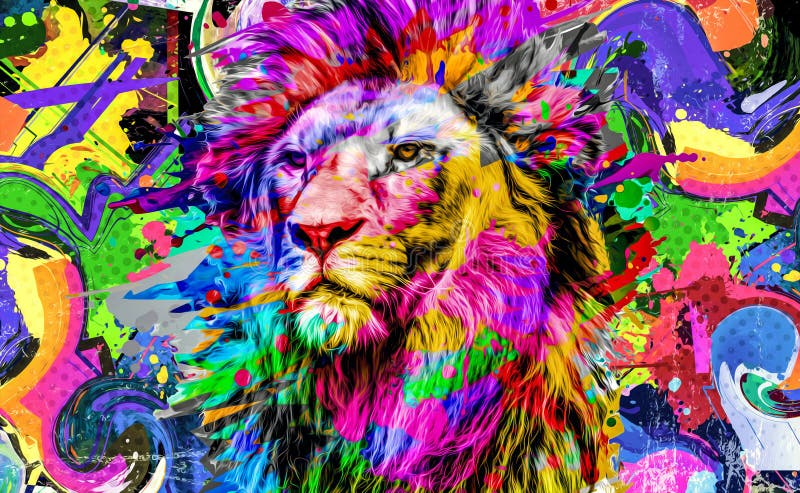

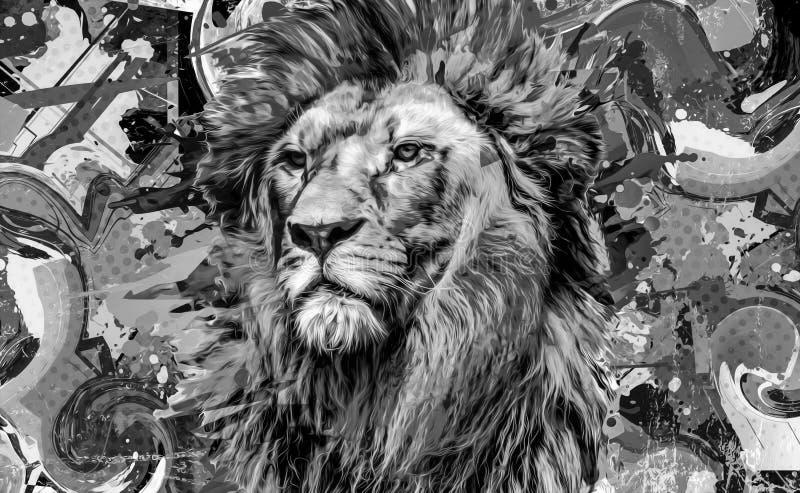

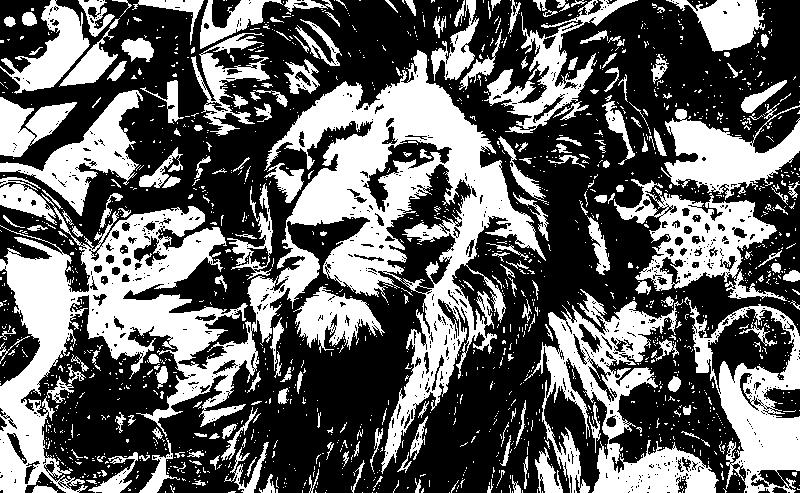

In [59]:
!echo "Downloading image notebooks"
# URL da imagem
# url = 'https://i.pinimg.com/originals/b4/1e/a8/b41ea89a75014c8f980138b9b1e1e9c2.jpg'
url = 'https://thumbs.dreamstime.com/b/ilustra%C3%A7%C3%A3o-criativa-abstrata-com-le%C3%A3o-colorido-cor-preta-de-190846410.jpg'

# removendo arquivos gerados
!rm original_image.jpg
!rm grayscale_image.jpg
!rm binary_image.jpg

# Baixar e processar a imagem
image_data = download_image(url)
image = parse_image(image_data)
grayscale_image = image_to_grayscale(image)
binary_image = binarize_image(grayscale_image)

# Salvar as imagens resultantes
grayscale_image.save('grayscale_image.jpg')
binary_image.save('binary_image.jpg')

display(IPImage(filename="/content/original_image.jpg"))
display(IPImage(filename="/content/grayscale_image.jpg"))
display(IPImage(filename="/content/binary_image.jpg"))